# Exercise 2

In [1]:
import matplotlib.pyplot as plt
% matplotlib inline
import os
import pandas as pd

In [2]:
# Plot output defaults
IMG_DIR = 'img'
IMG_FORMAT = 'pdf'
IMG_WIDTH = 7 # inches

In [3]:
def save_fig(fig, name, width=IMG_WIDTH, img_dir=IMG_DIR, img_format=IMG_FORMAT):
    """Save `matplotlib.figure.Figure` instance, resized to the specified width"""
    # Resize
    w, h = fig.get_size_inches()
    fig.set_size_inches(width, width/w * h)
    
    fname = '.'.join((os.path.join(img_dir, name), img_format))
    fig.savefig(fname)
    print('Saved:',fname)

## Question 1
Plot calibrated ages versus depth.

In [4]:
df = pd.read_csv('data/nps.csv', index_col=0) # all depths, nps

In [5]:
df = pd.read_csv('data/nps.csv', index_col=0) # all depths, nps
df2 = pd.read_csv('data/age_tie_points.csv', index_col=0) # only tie points

# Mark tie_points
df2['tie_point'] = True
df2 = df2[['tie_point']] # delete redundant age column
df = pd.concat((df, df2), axis=1)
df.ix[:, 'tie_point'].fillna(False, inplace=True)

Saved: img/line_age_depth.pdf


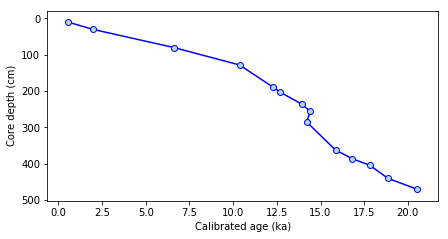

In [6]:
fig, ax = plt.subplots(figsize=(IMG_WIDTH,IMG_WIDTH/2))
age = df['age']/1000.
ax.plot(age, df.index, c='blue')
ax.scatter(age[df.tie_point], df[df.tie_point].index,
           c='lightblue', edgecolors='blue',
           zorder=ax.lines[0].get_zorder()+1)
ax.set_xlabel('Calibrated age (ka)')
ax.set_ylabel('Core depth (cm)')
plt.gca().invert_yaxis()

save_fig(fig, 'line_age_depth')